# Activation Functions

With them, MLP become universal approximators

In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

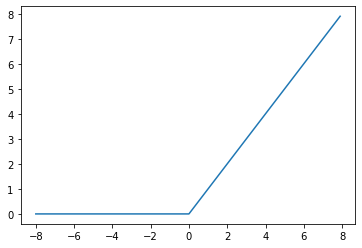

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.plot(x.detach(), y.detach())

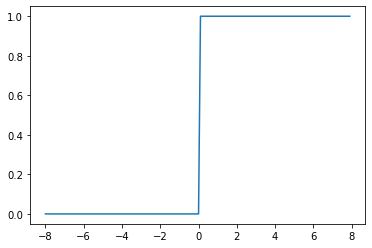

In [3]:
y.backward(torch.ones_like(x), retain_graph=True) 
plt.plot(x.detach(),  x.grad)

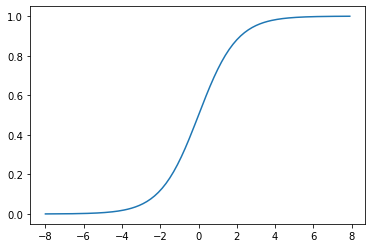

In [4]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
plt.plot(x.detach(), y.detach())

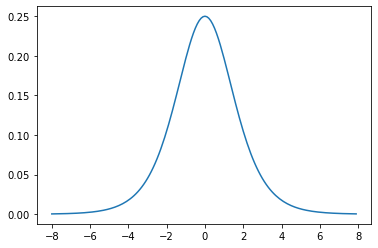

In [5]:
y.backward(torch.ones_like(x), retain_graph=True) 
plt.plot(x.detach(),  x.grad)

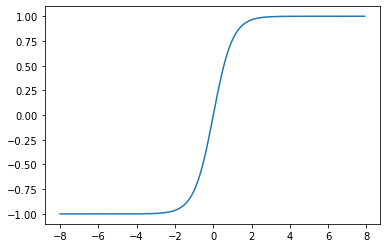

In [6]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.tanh(x)
plt.plot(x.detach(), y.detach())

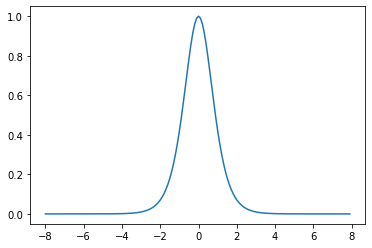

In [7]:
y.backward(torch.ones_like(x), retain_graph=True) 
plt.plot(x.detach(),  x.grad)

# MLP From Scratch

In [63]:
import numpy as np
X = np.random.rand(3,1000)
W = np.array([[1,1,1],
              [-1,0,-1]])

w1 = W[0,:]
w2 = W[1,:]

In [64]:
w1, w2

(array([1, 1, 1]), array([-1,  0, -1]))

In [65]:
X.T

array([[0.87668193, 0.61720452, 0.04902025],
       [0.4157096 , 0.41432808, 0.97606234],
       [0.06661191, 0.45752677, 0.72895394],
       ...,
       [0.71132588, 0.36892266, 0.79583315],
       [0.79682555, 0.95744639, 0.86782098],
       [0.87453267, 0.63276238, 0.19603108]])

In [66]:
W

array([[ 1,  1,  1],
       [-1,  0, -1]])

In [67]:
y1 =  np.dot(w1, X)
y2 =  np.dot(w2, X)

In [68]:
y1.shape, y2.shape

((1000,), (1000,))

In [69]:
Y = np.concatenate((y1.reshape(-1,1), y2.reshape(-1,1)), axis = 1)
Y

array([[ 1.5429067 , -0.92570217],
       [ 1.80610001, -1.39177193],
       [ 1.25309262, -0.79556586],
       ...,
       [ 1.87608169, -1.50715903],
       [ 2.62209292, -1.66464653],
       [ 1.70332614, -1.07056376]])

In [70]:
def fit(X, y, iteration, alpha = 0.001):
    Js = [] # Store Cost value for each 100th iteration 
    w = np.random.rand(1,3)
    n = len(X)
    for i in range(iteration):
        # Forward Propagation
        a = np.dot(w, X)
        e = a-y
        # Backward Propagation
        dw = (1 / n) * np.dot(e, X.T)

        # Gradient Descent 
        w = w - alpha * dw

        if i%10 == 0: # Store Cost value for each 100th iteration 
            c = np.sum(e**2)
            Js.append(c)
    return w, Js

In [71]:
w, Js = fit(X, y2, iteration = 100)

In [72]:
w

array([[-0.99050546, -0.02347564, -0.98594735]])

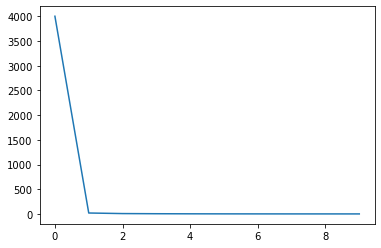

In [73]:
plt.plot(Js)

In [74]:
Js

[4000.248291578844,
 18.5720274986641,
 7.047264024189644,
 3.963540044836943,
 2.232110217970318,
 1.2570435037044332,
 0.7079225447682638,
 0.3986777078192586,
 0.224522025709234,
 0.12644357232340225]

In [75]:
myw1, Js = fit(X, y1, iteration = 100)
myw2, Js = fit(X, y2, iteration = 100)

In [76]:
myw1

array([[1.02438442, 0.98877912, 0.98662293]])

In [77]:
myw2

array([[-0.98489254, -0.03330007, -0.98172635]])

In [78]:
Js

[5813.43442147065,
 33.65518570842593,
 14.007795271825225,
 7.882573656055755,
 4.440007565207159,
 2.5009380011931226,
 1.4087197704921839,
 0.7935034303725534,
 0.4469671158313987,
 0.2517705639004312]